# Filling in Missing Data

Emissions, GDP, and poverty rates generally don’t swing wildly from year to year, they rise or fall in consistent trends that allowed us to make straight line inferences using a linear fill with Panda’s interpolate method. We chose to fill in up to 4 years both forward and backward from a true isolated data point.


In [1]:
import pandas as pd
import numpy as np
import missingno as msno

df = pd.read_csv("./data/complete_dataset.csv")

df.head()


,country,c_code,indicator,i_code,gas,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,Agriculture,NaN,All GHG,8.07,8.40,8.41,8.49,8.52,...,15.790000,15.900000,15.780000,15.720000,16.220000,15.110000,15.320000,15.220000,14.850000,15.540000
1,Afghanistan,AFG,Agriculture,NaN,CH4,5.36,5.61,5.67,5.72,5.93,...,11.510000,11.530000,11.380000,11.280000,11.480000,10.850000,10.630000,10.330000,10.540000,10.920000
2,Afghanistan,AFG,Agriculture,NaN,N2O,2.71,2.79,2.74,2.77,2.60,...,4.270000,4.370000,4.400000,4.440000,4.740000,4.260000,4.680000,4.900000,4.310000,4.630000
3,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.210069,23.743664,24.390874,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971
4,Afghanistan,AFG,Average proportion of deprivations for people ...,SD_MDP_ANDI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52.500000,NaN,NaN,NaN


<AxesSubplot: >

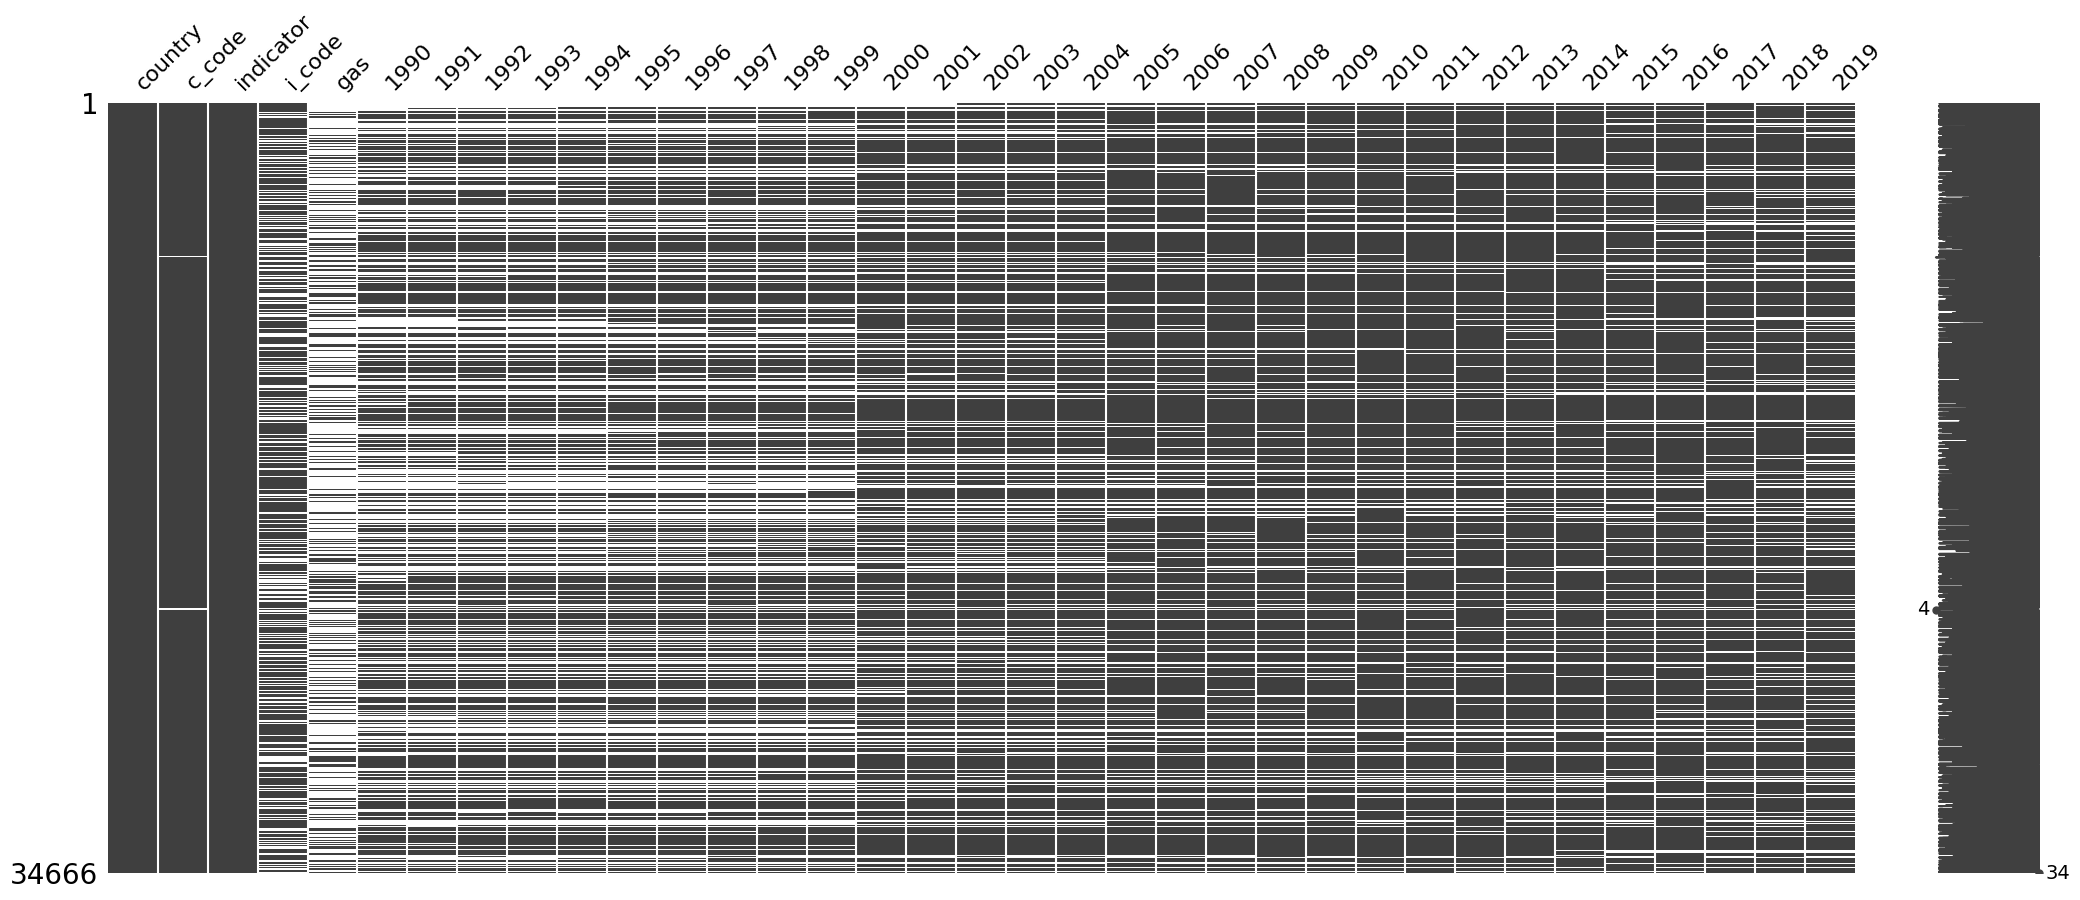

In [2]:
msno.matrix(df)


<AxesSubplot: >

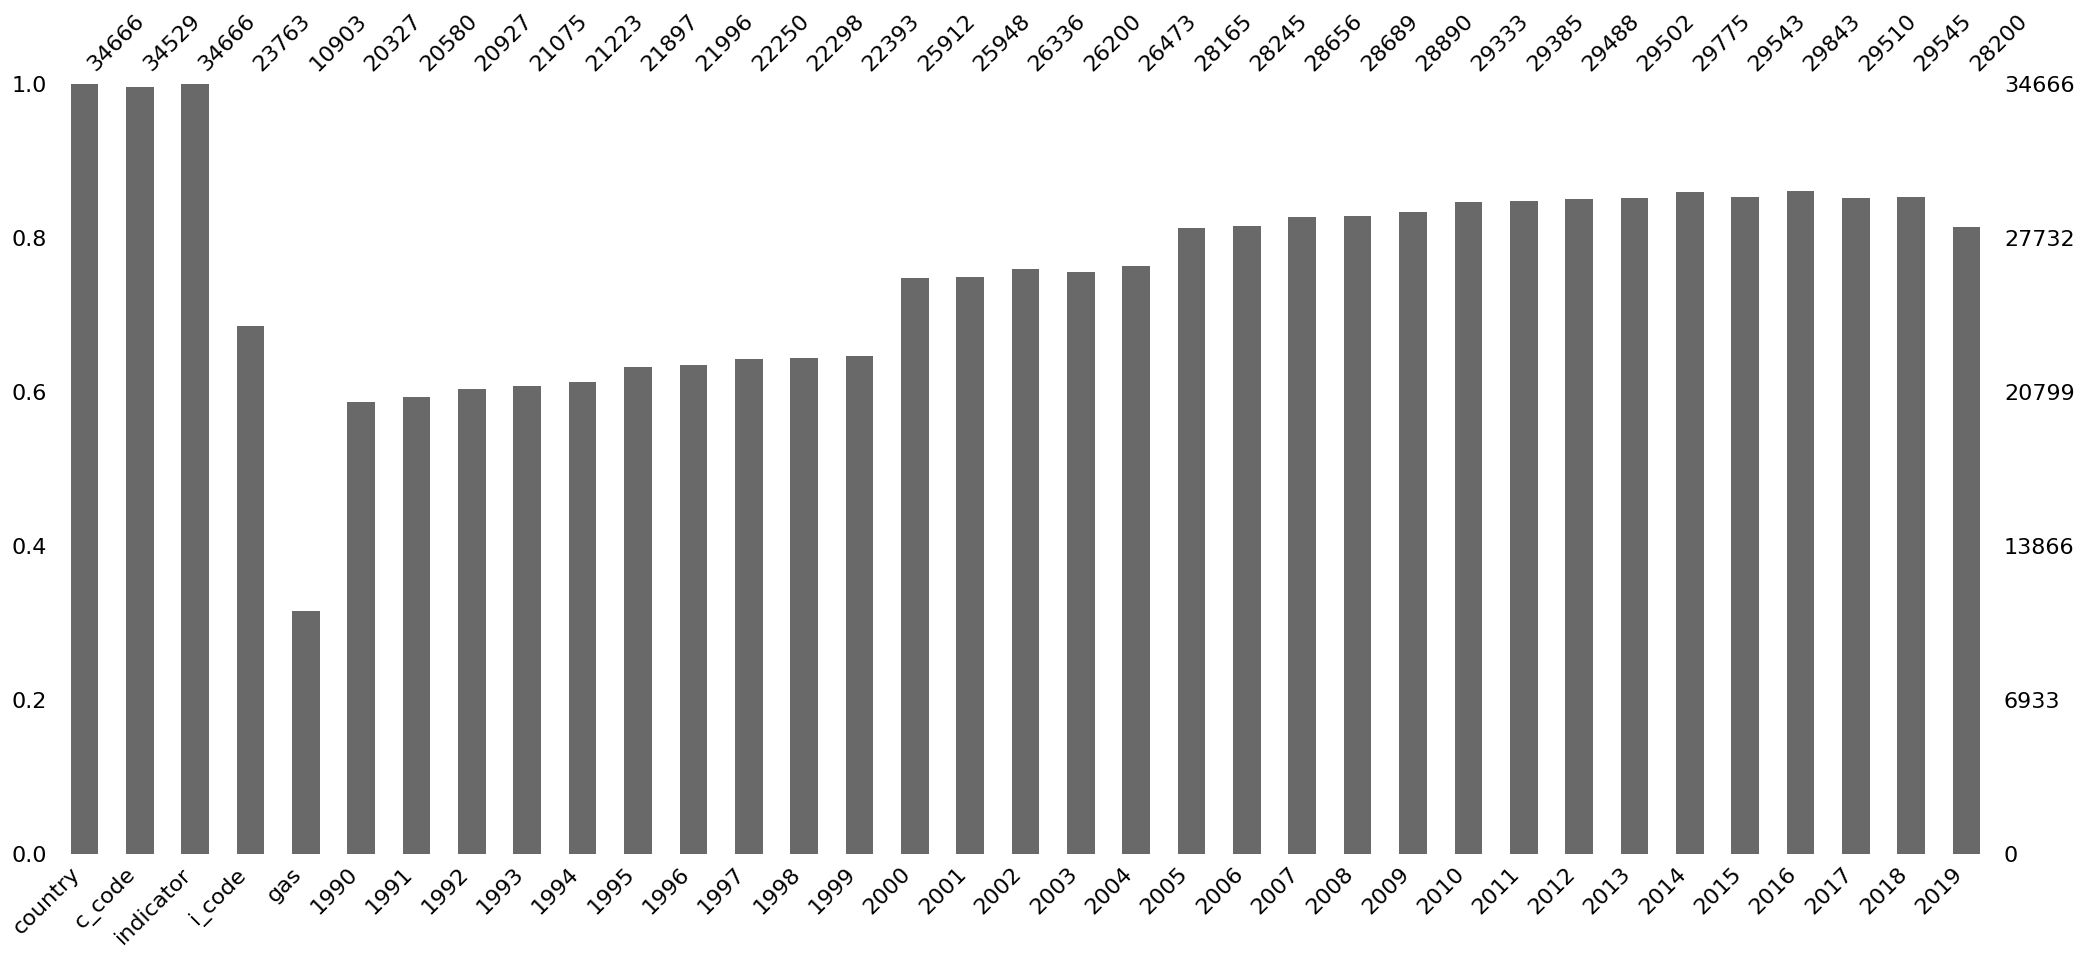

In [3]:
msno.bar(df)


In [4]:
years = list(map(str, range(1990, 2020)))

# Interpolate data between years, up to 4 years in either direction.
interpolated_years = (
    df[years]
    .transform(pd.to_numeric)
    .interpolate(method="linear", axis="columns", limit=4, limit_direction="both")
)

interpolated_df = pd.concat([df.iloc[:, :5], interpolated_years], axis="columns")


Reproducing the missingno visualizations shows the difference that interpolation makes.


<AxesSubplot: >

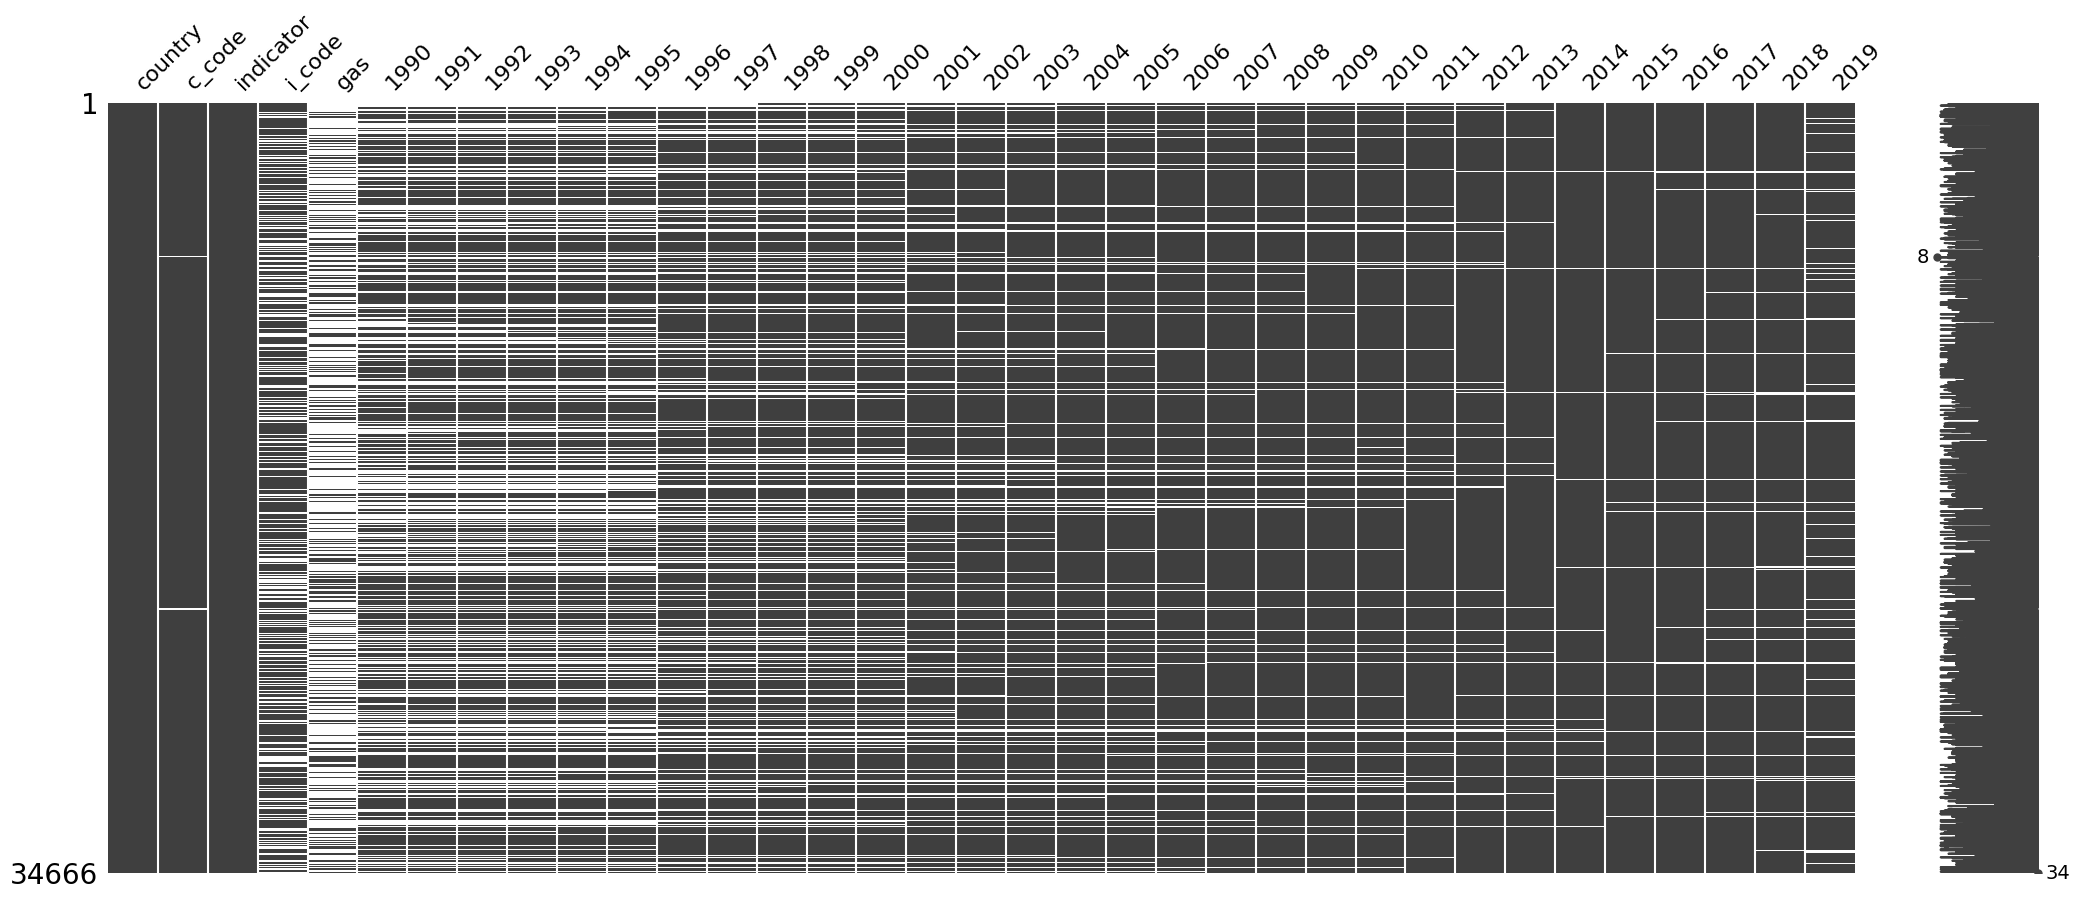

In [5]:
msno.matrix(interpolated_df)


<AxesSubplot: >

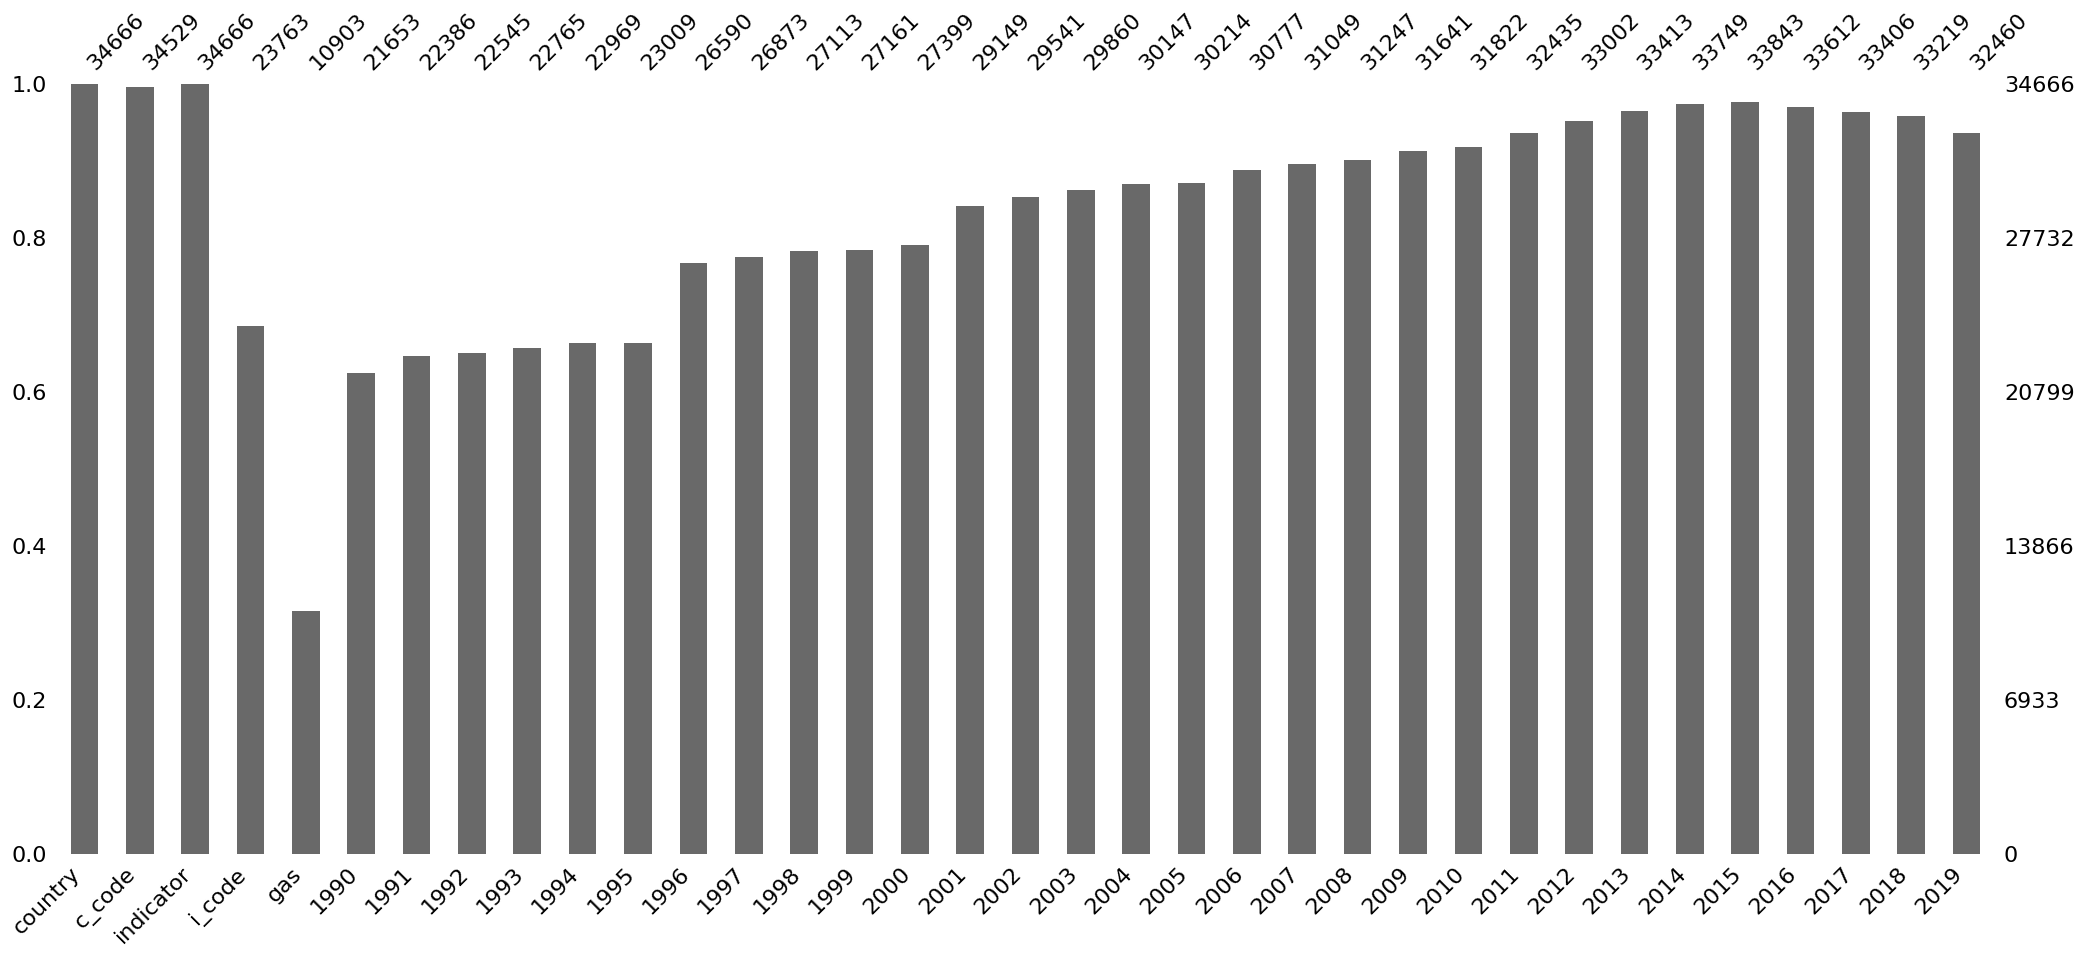

In [6]:
msno.bar(interpolated_df)


Our combined and _interpolated_ dataset contains `34,667` rows, but the extra data in between points brings the total size up to about `11.7 MB` as a csv.


In [7]:
# Uncomment to replace the complete_dataset
# interpolated_df.to_csv("./data/complete_dataset_with_interpolation.csv", index=False)

# Output the first 100 records as a sample set
interpolated_df.head(100).to_csv("./data/complete_dataset_with_interpolation_sample.csv", index=False)


In [8]:
%reload_ext watermark

%watermark -iv -v -m

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : Clang 13.1.6 (clang-1316.0.21.2.5)
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas   : 1.5.0
sys      : 3.10.6 (main, Aug 30 2022, 05:12:36) [Clang 13.1.6 (clang-1316.0.21.2.5)]
numpy    : 1.23.3
missingno: 0.5.1

